### Image classification project on dog cat dataset 

In [2]:
import numpy as np 
import os 
import cv2   #opencv
from PIL import Image
print("libraries imported")

libraries imported


In [3]:
cat_image_demo_file_path = r"C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images\cats\cat_78.jpg"

In [4]:
cat = Image.open(cat_image_demo_file_path)

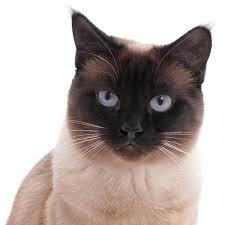

In [5]:
cat 

In [7]:
cat_image  =  np.array(cat)
cat_image.shape 

(225, 225, 3)

In [ ]:
# read numpy array form   

In [9]:
cd Data

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN\\Data'

In [11]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data

30-07-2024  17:12    <DIR>          .
30-07-2024  17:12    <DIR>          ..
30-07-2024  17:12    <DIR>          images
               0 File(s)              0 bytes
               3 Dir(s)  14,729,150,464 bytes free


In [12]:
cd images

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [13]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images

30-07-2024  17:12    <DIR>          .
30-07-2024  17:12    <DIR>          ..
30-07-2024  17:12    <DIR>          cats
30-07-2024  17:12    <DIR>          dogs
               0 File(s)              0 bytes
               4 Dir(s)  14,717,943,808 bytes free


In [14]:
cd cats/

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN\Data\images\cats


C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [18]:
cd ..

C:\Users\Ranjit\Desktop\1st_june_data_science\CNN


In [19]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\1st_june_data_science\\CNN'

In [31]:
path_dict = {'cats':[],'dogs':[]}
image_folder_path ="./Data/images" 
for dire in os.listdir(image_folder_path):
    directory_path = os.path.join(image_folder_path,dire)
    for image_name in os.listdir(directory_path):
        path_dict[dire].append(os.path.join(directory_path,image_name ))

In [37]:
path_dict['dogs'][2]

'./Data/images\\dogs\\dog_100.jpg'

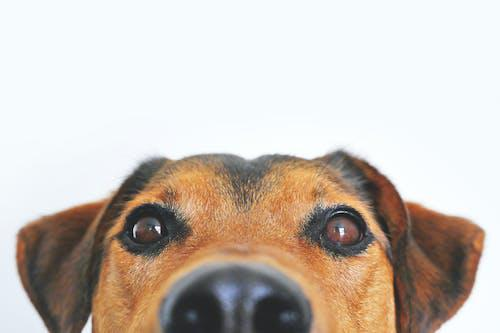

In [44]:
Image.open(path_dict['dogs'][11])

In [49]:


# np.array(Image.open(path_dict['cats'][2]))

In [50]:
cv2.imread(path_dict['cats'][2])

x = []    # <=== images 
y =  []   # <== cat 

array([[[250, 240, 233],
        [250, 240, 233],
        [250, 240, 233],
        ...,
        [  9,  11,  12],
        [  9,  11,  11],
        [  9,  11,  11]],

       [[250, 240, 233],
        [250, 240, 233],
        [250, 240, 233],
        ...,
        [  9,  11,  12],
        [  9,  11,  11],
        [  9,  11,  11]],

       [[250, 240, 233],
        [250, 240, 233],
        [250, 240, 233],
        ...,
        [  9,  11,  12],
        [  9,  11,  11],
        [  9,  11,  11]],

       ...,

       [[121, 111, 124],
        [119, 109, 122],
        [116, 106, 119],
        ...,
        [ 25,  20,  21],
        [ 25,  20,  21],
        [ 25,  20,  21]],

       [[122, 112, 125],
        [119, 109, 122],
        [115, 105, 118],
        ...,
        [ 24,  19,  20],
        [ 24,  19,  20],
        [ 24,  19,  20]],

       [[123, 113, 126],
        [119, 109, 122],
        [114, 104, 117],
        ...,
        [ 23,  18,  19],
        [ 23,  18,  19],
        [ 23,  18,  19]]